In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [79]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0

testY = []
trainY = []

for i in range(len(train_labels)):
  if( 0 <= train_labels[i] <= 4 or train_labels[i] == 6):
    trainY.append(0)
  elif(train_labels[i] == 5 or train_labels[i] == 7 or train_labels[i] == 9):
    trainY.append(1)
  else:
    trainY.append(2)

for i in range(len(test_labels)):
  if( 0 <= test_labels[i] <= 4 or test_labels[i] == 6):
    testY.append(0)
  elif(test_labels[i] == 5 or test_labels[i] == 7 or test_labels[i] == 9):
    testY.append(1)
  else:
    testY.append(2)



trainY = to_categorical(trainY, 3)
testY = to_categorical(testY, 3)

In [80]:
print(len(train_images),
len(test_images),
len(trainY),
len(testY))

60000 10000 60000 10000


In [81]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(3, activation="softmax"),
    ]
)

In [82]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [83]:
model.fit(train_images, trainY, epochs=10, validation_data=(test_images, testY), batch_size=128)

Epoch 1/10
469/469 [==============================] - 66s 139ms/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 0.0313 - val_accuracy: 0.9907
Epoch 2/10
469/469 [==============================] - 62s 133ms/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0251 - val_accuracy: 0.9923
Epoch 3/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0198 - val_accuracy: 0.9937
Epoch 4/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0192 - val_accuracy: 0.9947
Epoch 5/10
469/469 [==============================] - 61s 130ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0186 - val_accuracy: 0.9947
Epoch 6/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.0184 - val_accuracy: 0.9943
Epoch 7/10
469/469 [==============================] - 66s 142ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0177 - val_ac

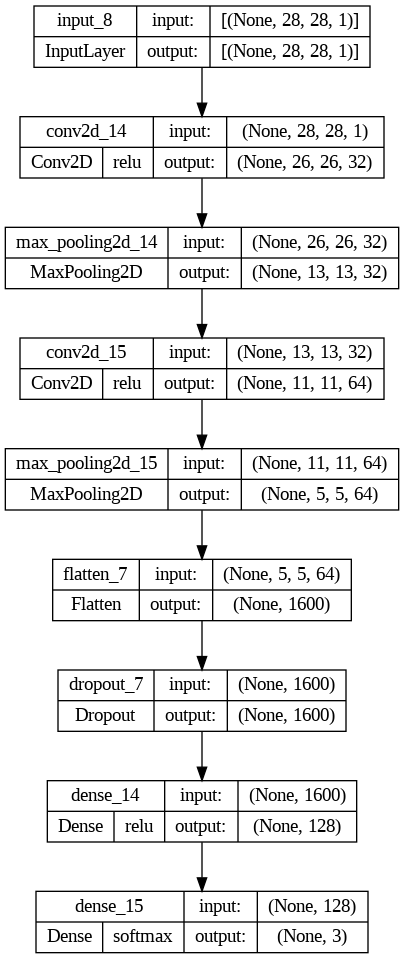

In [84]:
keras.utils.plot_model(model, "model.png", show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1600)             

In [86]:
test_loss, test_acc = model.evaluate(test_images, testY)
train_loss, train_acc= model.evaluate(train_images, trainY)
val_loss, val_acc = model.evaluate(test_images, testY)

313/313 [==============================] - 3s 10ms/step - loss: 0.0135 - accuracy: 0.9963


313/313 [==============================] - 3s 10ms/step


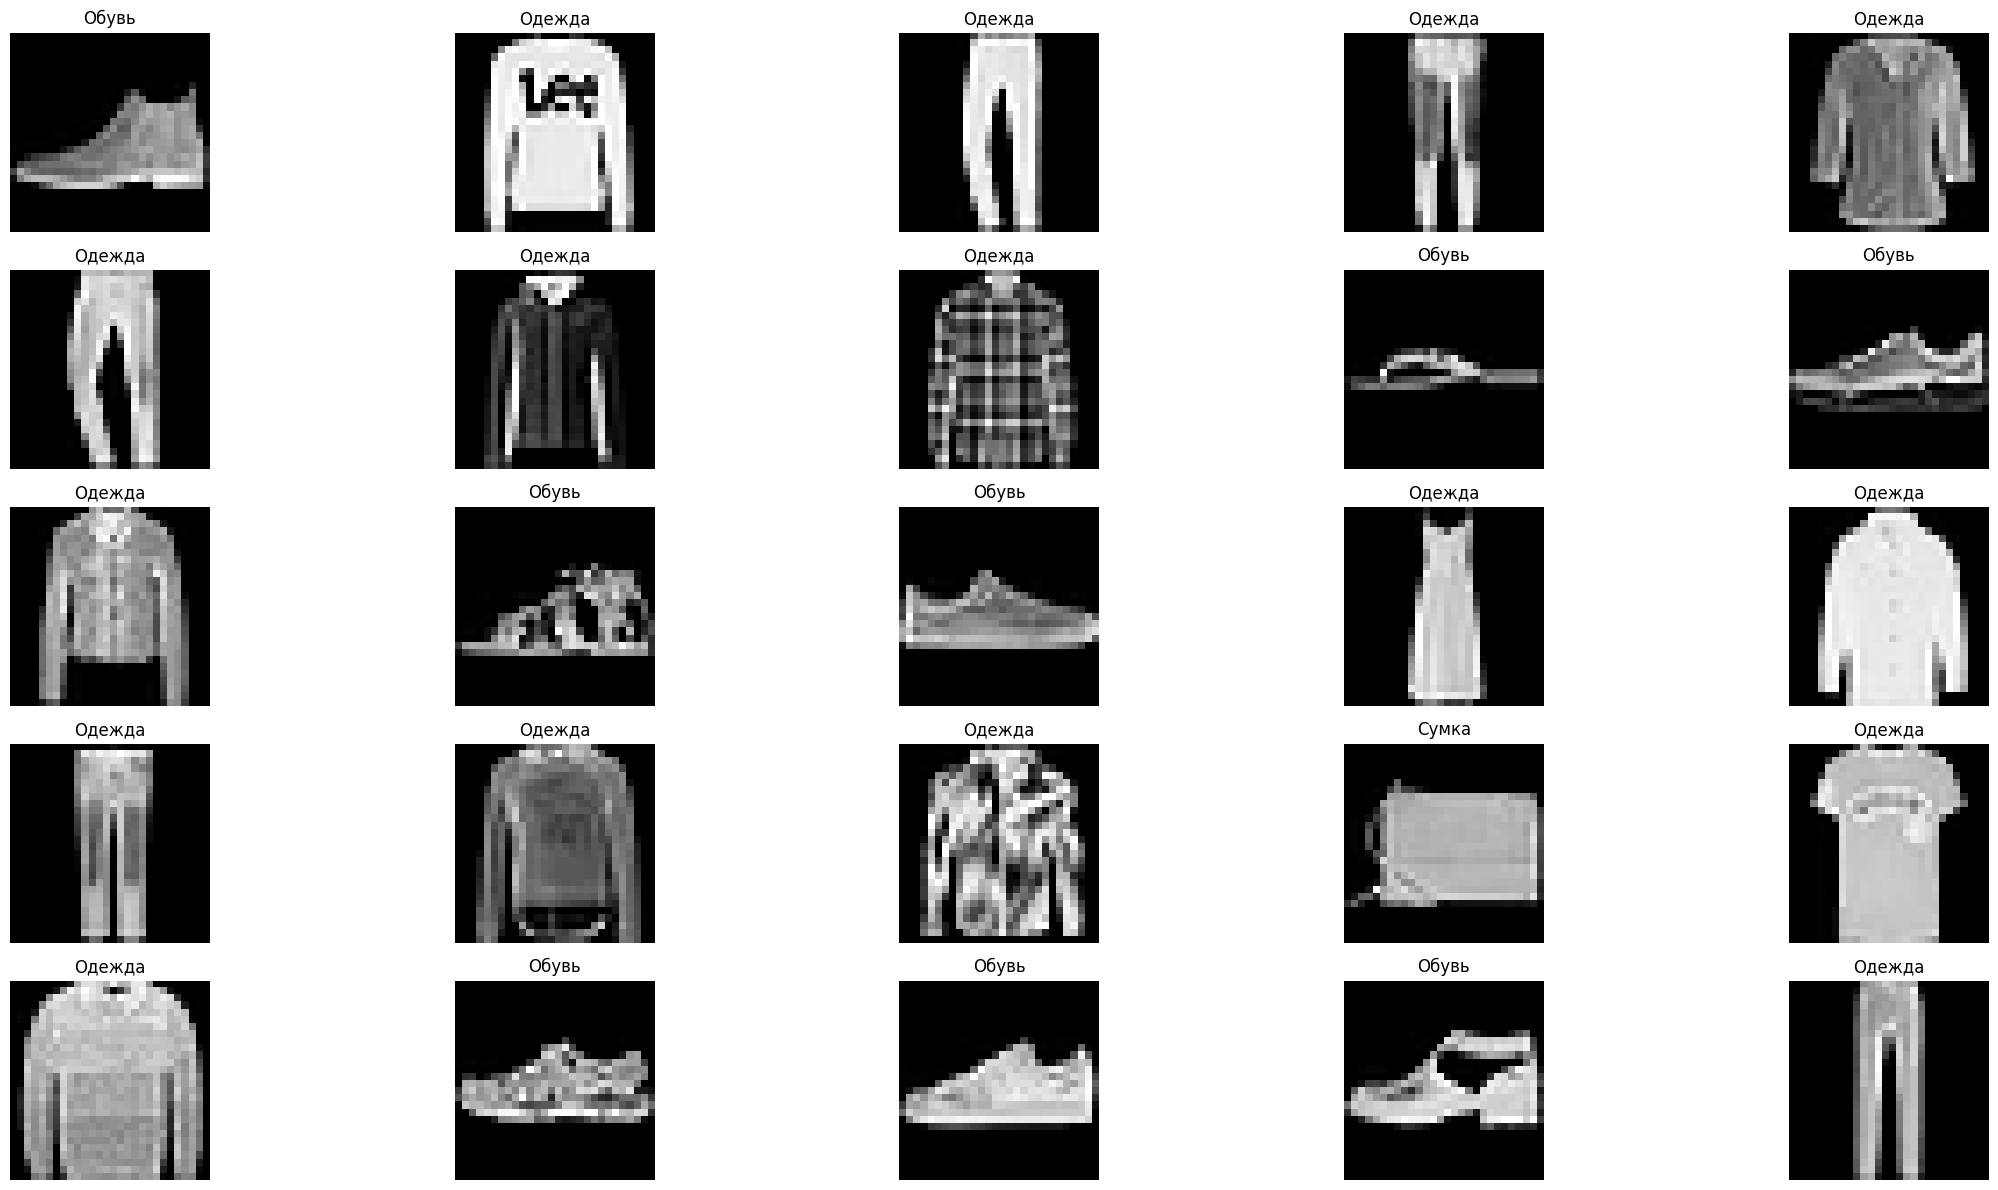

In [88]:
predicts = model.predict(test_images)
predicted_lbs = [np.argmax(prediction) for prediction in predicts]

fig, axes = plt.subplots(5, 5, figsize=(24, 12))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(test_images[i].reshape(28, 28), cmap='gray')
    if(predicted_lbs[i] == 0):
      axes[i].set_title("Одежда")
    elif(predicted_lbs[i] == 1):
      axes[i].set_title("Обувь")
    else:
      axes[i].set_title("Сумка")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [89]:
model.save("/content/drive/MyDrive/my_model2")